In [1]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [3]:
from pprint import pprint

In [5]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
a=([(X.text, X.label_) for X in doc.ents])
a


[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_colwidth',-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [4]:
url='https://raw.githubusercontent.com/zameer0786/Karthik_Zameer/master/BBC%20News%20Train.csv'
df = pd.read_csv(url)
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper worldcom s ex-head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy. prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper who now runs her own consulting business told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a green light to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud arguing that auditors did not alert him to any problems. ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief giving only brief answers himself. the prosecution s star witness former worldcom financial chief scott sullivan has said that mr ebbers ordered accounting adjustments at the firm telling him to hit our books . however ms cooper said mr sullivan had not mentioned anything uncomfortable about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004 and is now known as mci. last week mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.,business
1,154,german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy. munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up. we re surprised that the ifo index has taken such a knock said dz bank economist bernd weidensteiner. the main reason is probably that the domestic economy is still weak particularly in the retail trade. economy and labour minister wolfgang clement called the dip in february s ifo confidence figure a very mild decline . he said that despite the retreat the index remained at a relatively high level and that he expected a modest economic upswing to continue. germany s economy grew 1.6% last year after shrinking in 2003. however the economy contracted by 0.2% during the last three months of 2004 mainly due to the reluctance of consumers to spend. latest indications are that growth is still proving elusive and ifo president hans-werner sinn said any improvement in german domestic demand was sluggish. exports had kept things going during the first half of 2004 but demand for exports was then hit as the value of the euro hit record levels making german products less competitive overseas. on top of that the unemployment rate has been stuck at close to 10% and manufacturing firms including daimlerchrysler siemens and volkswagen have been negotiating with unions over cost cutting measures. analysts said that the ifo figures and germany s continuing problems may delay an interest rate rise by the european central bank. eurozone interest rates are at 2% but comments from senior officials have recently focused on the threat of inflation prompting fears that interest rates may rise.,business
2,1101,bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service

In [20]:
# Dropping the category and performing k-means clustering

In [5]:
df.drop(columns='Category',inplace=True)

In [6]:
df

,ArticleId,Text
0,1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper worldcom s ex-head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy. prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper who now runs her own consulting business told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a green light to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud arguing that auditors did not alert him to any problems. ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief giving only brief answers himself. the prosecution s star witness former worldcom financial chief scott sullivan has said that mr ebbers ordered accounting adjustments at the firm telling him to hit our books . however ms cooper said mr sullivan had not mentioned anything uncomfortable about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004 and is now known as mci. last week mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.
1,154,german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy. munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up. we re surprised that the ifo index has taken such a knock said dz bank economist bernd weidensteiner. the main reason is probably that the domestic economy is still weak particularly in the retail trade. economy and labour minister wolfgang clement called the dip in february s ifo confidence figure a very mild decline . he said that despite the retreat the index remained at a relatively high level and that he expected a modest economic upswing to continue. germany s economy grew 1.6% last year after shrinking in 2003. however the economy contracted by 0.2% during the last three months of 2004 mainly due to the reluctance of consumers to spend. latest indications are that growth is still proving elusive and ifo president hans-werner sinn said any improvement in german domestic demand was sluggish. exports had kept things going during the first half of 2004 but demand for exports was then hit as the value of the euro hit record levels making german products less competitive overseas. on top of that the unemployment rate has been stuck at close to 10% and manufacturing firms including daimlerchrysler siemens and volkswagen have been negotiating with unions over cost cutting measures. analysts said that the ifo figures and germany s continuing problems may delay an interest rate rise by the european central bank. eurozone interest rates are at 2% but comments from senior officials have recently focused on the threat of inflation prompting fears that interest rates may rise.
2,1101,bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world eco

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
Vect = vectorizer.fit_transform(df['Text'])

In [13]:
Vect

<1490x24456 sparse matrix of type '<class 'numpy.float64'>'
	with 213866 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Vect)
    wcss.append(kmeans.inertia_)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
wcss

[1457.4153694660044,
 1444.5377845124117,
 1434.6328864156285,
 1425.5041567131532,
 1418.2296205062773,
 1411.7297215844824,
 1407.2822219830184,
 1403.1673108661705,
 1397.7136647811913,
 1391.3922021069336]

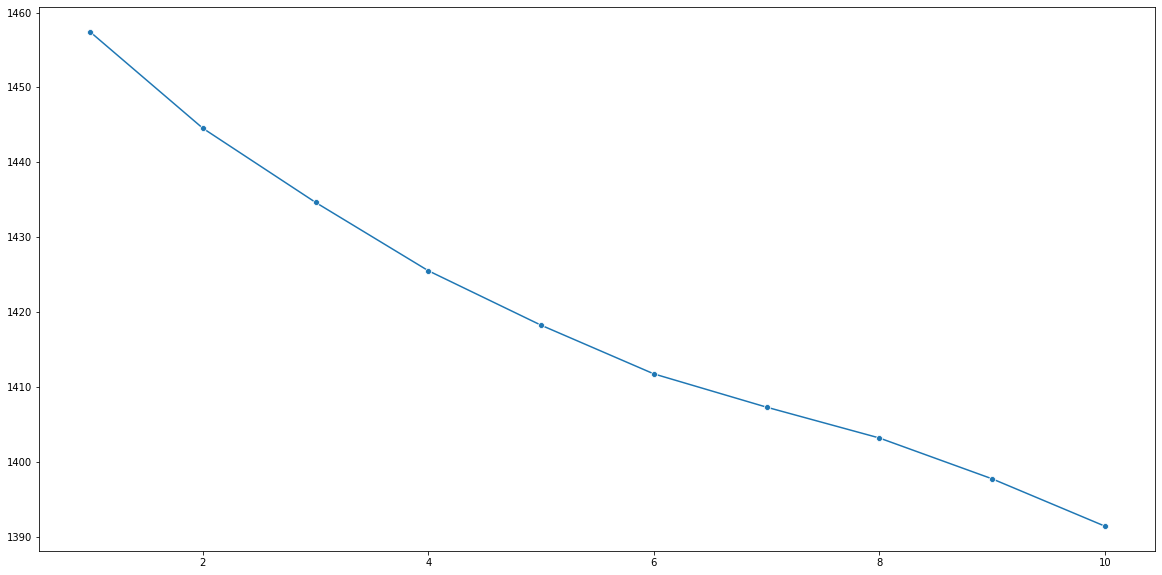

In [24]:
plt.subplots(figsize=(20,10))
sns.lineplot(list(range(1,11)),wcss,marker='o')
plt.show()

In [28]:
# So , selecting no of clusters as 6 from the elbow diagram

In [29]:
kmm = KMeans(6).fit(Vect)

In [30]:
kmm.labels_

array([5, 1, 1, ..., 1, 0, 0], dtype=int32)

In [31]:
df['Cluster_Labels'] = kmm.labels_

In [32]:
df

,ArticleId,Text,Cluster_Labels
0,1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper worldcom s ex-head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy. prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper who now runs her own consulting business told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a green light to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud arguing that auditors did not alert him to any problems. ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief giving only brief answers himself. the prosecution s star witness former worldcom financial chief scott sullivan has said that mr ebbers ordered accounting adjustments at the firm telling him to hit our books . however ms cooper said mr sullivan had not mentioned anything uncomfortable about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004 and is now known as mci. last week mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.,5
1,154,german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy. munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up. we re surprised that the ifo index has taken such a knock said dz bank economist bernd weidensteiner. the main reason is probably that the domestic economy is still weak particularly in the retail trade. economy and labour minister wolfgang clement called the dip in february s ifo confidence figure a very mild decline . he said that despite the retreat the index remained at a relatively high level and that he expected a modest economic upswing to continue. germany s economy grew 1.6% last year after shrinking in 2003. however the economy contracted by 0.2% during the last three months of 2004 mainly due to the reluctance of consumers to spend. latest indications are that growth is still proving elusive and ifo president hans-werner sinn said any improvement in german domestic demand was sluggish. exports had kept things going during the first half of 2004 but demand for exports was then hit as the value of the euro hit record levels making german products less competitive overseas. on top of that the unemployment rate has been stuck at close to 10% and manufacturing firms including daimlerchrysler siemens and volkswagen have been negotiating with unions over cost cutting measures. analysts said that the ifo figures and germany s continuing problems may delay an interest rate rise by the european central bank. eurozone interest rates are at 2% but comments from senior officials have recently focused on the threat of inflation prompting fears that interest rates may rise.,1
2,1101,bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll be

In [33]:
# NAmed entity mapping

In [34]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from pprint import pprint

In [123]:
entity=[]
for i in df['Text']:
  doc = nlp(i)
  a=([(X.text, X.label_) for X in doc.ents])
  entity.append(a)

In [124]:
ent=[]
for i in entity:
  res = set(i)
  ent.append(res)

In [47]:
df['Entities'] = ent

In [48]:
df

,ArticleId,Text,Cluster_Labels,Entities
0,1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper worldcom s ex-head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy. prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper who now runs her own consulting business told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a green light to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud arguing that auditors did not alert him to any problems. ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief giving only brief answers himself. the prosecution s star witness former worldcom financial chief scott sullivan has said that mr ebbers ordered accounting adjustments at the firm telling him to hit our books . however ms cooper said mr sullivan had not mentioned anything uncomfortable about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004 and is now known as mci. last week mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.,5,"{(2004, DATE), (us, GPE), (sullivan, PERSON), (first, ORDINAL), (2002, DATE), (new york, GPE), (scott sullivan, PERSON), (early 2001 and 2002, DATE), (arthur andersen, PERSON), (85 years, DATE), (worldcom, ORG), (6.75bn, MONEY), (mci, ORG), (ms cooper, ORG), (wednesday, DATE), (bernie ebbers, PERSON), (2001, DATE), (s, PRODUCT), (5.7bn, MONEY), (ebber s, PRODUCT), (cynthia cooper, PERSON), (11bn, MONEY), (last week, DATE), (cooper, PERSON)}"
1,154,german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy. munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up. we re surprised that the ifo index has taken such a knock said dz bank economist bernd weidensteiner. the main reason is probably that the domestic economy is still weak particularly in the retail trade. economy and labour minister wolfgang clement called the dip in february s ifo confidence figure a very mild decline . he said that despite the retreat the index remained at a relatively high level and that he expected a modest economic upswing to continue. germany s economy grew 1.6% last year after shrinking in 2003. however the economy contracted by 0.2% during the last three months of 2004 mainly due to the reluctance of consumers to spend. latest indications are that growth is still proving elusive and ifo president hans-werner sinn said any improvement in german domestic demand was sluggish. exports had kept things going during the first half of 2004 but demand for exports was then hit as the value of the euro hit record levels making german products less competitive overseas. on top of that the unemployment rate has been stuck at close to 10% and manufacturing firms including daimlerchrysler siemens and volkswagen have been negotia

In [49]:
# Key information from each article

In [54]:
import nltk

In [57]:
!pip install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=6448d87fc442d5d359c5a8693a3a239d5138bf330ddc135e153e1a4e69eb0945
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [58]:
from rake_nltk import Rake
r = Rake()

In [59]:
key=[]
for i in df['Text']:
    #Example
    a=r.extract_keywords_from_text(i)
    b=r.get_ranked_phrases()
    c=r.get_ranked_phrases_with_scores()
    key.append(c)

In [60]:
# we calculate the means scores for each article and take the words who have their scores > mean*2

In [66]:
score=[]
avg=[]
for i in key:
    score=[]
    for j in i:
        #print(j[0])
        score.append(j[0])
    avg.append(np.mean(score)*2)

In [67]:
main=[]
for i,j in zip(key,avg):
    filt=[]
    
   
    
    
    for q in range(0,len(i)):
        if(i[q][0]>j):
                
            filt.append((i[q][1]))
    main.append(str(filt))

In [68]:
df['Key_Info'] = main

In [69]:
df

,ArticleId,Text,Cluster_Labels,Entities,Key_Info
0,1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper worldcom s ex-head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy. prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper who now runs her own consulting business told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a green light to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud arguing that auditors did not alert him to any problems. ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief giving only brief answers himself. the prosecution s star witness former worldcom financial chief scott sullivan has said that mr ebbers ordered accounting adjustments at the firm telling him to hit our books . however ms cooper said mr sullivan had not mentioned anything uncomfortable about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004 and is now known as mci. last week mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.,5,"{(2004, DATE), (us, GPE), (sullivan, PERSON), (first, ORDINAL), (2002, DATE), (new york, GPE), (scott sullivan, PERSON), (early 2001 and 2002, DATE), (arthur andersen, PERSON), (85 years, DATE), (worldcom, ORG), (6.75bn, MONEY), (mci, ORG), (ms cooper, ORG), (wednesday, DATE), (bernie ebbers, PERSON), (2001, DATE), (s, PRODUCT), (5.7bn, MONEY), (ebber s, PRODUCT), (cynthia cooper, PERSON), (11bn, MONEY), (last week, DATE), (cooper, PERSON)}","['boss launches defence lawyers defending former worldcom chief bernie ebbers', 'star witness former worldcom financial chief scott sullivan', 'shareholder meetings mr ebbers often passed', 'however ms cooper said mr sullivan', 'meet wall street earnings estimates', 'mr ebbers ordered accounting adjustments', 'mr ebbers could face', 'ms cooper also said', '2001 audit committee meeting', 'internal accounting alerted directors', 'last week mci agreed']"
1,154,german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy. munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up. we re surprised that the ifo index has taken such a knock said dz bank economist bernd weidensteiner. the main reason is probably that the domestic economy is still weak particularly in the retail trade. economy and labour minister wolfgang clement called the dip in february s ifo confidence figure a very mild decline . he said that despite the retreat the index remained at a relatively high level and that he expected a modest economic upswing to continue. germany s economy grew 1.6% last year after shrinking in 2003. however the economy contracted by 0.2% during the last three months of 2004 mainly due to the reluctance of consumers to spend. latest indications are that growth is

In [70]:
# TO find  key info from each cluster

In [102]:
clus=[]
for i in range(0,6):
  a = df[df['Cluster_Labels']==i]
  clus.append(a['Text'].values)
  
    




In [103]:
len(clus)

6

In [104]:
key1=[]
for i in clus:
    #Example
    d = str(i)
    a=r.extract_keywords_from_text(d)
    b=r.get_ranked_phrases()
    c=r.get_ranked_phrases_with_scores()
    key1.append(c)

In [105]:
score=[]
avg=[]
for i in key1:
    score=[]
    for j in i:
        #print(j[0])
        score.append(j[0])
    avg.append(np.mean(score)*1.5)

In [106]:
main1=[]
for i,j in zip(key,avg):
    filt=[]
    
   
    
    
    for q in range(0,len(i)):
        if(i[q][0]>j):
                
            filt.append((i[q][1]))
    main1.append(str(filt))

In [108]:
main1

["['boss launches defence lawyers defending former worldcom chief bernie ebbers', 'star witness former worldcom financial chief scott sullivan', 'shareholder meetings mr ebbers often passed', 'however ms cooper said mr sullivan', 'meet wall street earnings estimates', 'mr ebbers ordered accounting adjustments', 'mr ebbers could face', 'ms cooper also said', '2001 audit committee meeting', 'internal accounting alerted directors', 'last week mci agreed', 'external auditors arthur andersen', 'finance chief giving', 'mr ebbers orchestrated']",
 "['euro hit record levels making german products less competitive overseas', 'german business confidence slides german business confidence fell', 'knock said dz bank economist bernd weidensteiner', 'confident business sector would signal', 'labour minister wolfgang clement called', 'manufacturing firms including daimlerchrysler siemens', 'based research institute ifo said', 'continuing problems may delay', 'interest rates may rise', 'confidence inde

In [113]:
# Main info and named entity from 6 clusters

In [110]:
info = pd.DataFrame({'Category':['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6'],'Cluster_Info':main1})

In [111]:
info

,Category,Cluster_Info
0,Cluster1,"['boss launches defence lawyers defending former worldcom chief bernie ebbers', 'star witness former worldcom financial chief scott sullivan', 'shareholder meetings mr ebbers often passed', 'however ms cooper said mr sullivan', 'meet wall street earnings estimates', 'mr ebbers ordered accounting adjustments', 'mr ebbers could face', 'ms cooper also said', '2001 audit committee meeting', 'internal accounting alerted directors', 'last week mci agreed', 'external auditors arthur andersen', 'finance chief giving', 'mr ebbers orchestrated']"
1,Cluster2,"['euro hit record levels making german products less competitive overseas', 'german business confidence slides german business confidence fell', 'knock said dz bank economist bernd weidensteiner', 'confident business sector would signal', 'labour minister wolfgang clement called', 'manufacturing firms including daimlerchrysler siemens', 'based research institute ifo said', 'continuing problems may delay', 'interest rates may rise', 'confidence index fell', 'german domestic demand', 'ifo confidence figure']"
2,Cluster3,"['effects said pipa director steven kull', 'bbc poll indicates economic gloom citizens', '3 january 2005 across 22 countries', 'international polling firm globescan together', 'bbc world service poll believe', 'global economic performance says', 'years ago people seem', 'almost 23 000 people', 'growing developing economies china', 'results also may reflect', 'worse place even though', 'rome says one reason']"
3,Cluster4,"['using technology said dr michael bjorn senior advisor', 'study ericsson interviewed 14 000 mobile phone owners', 'lifestyle governs mobile choice faster better', 'ageing mobile owners encouraged older people', 'dr bjorn said groups dubbed pioneers', 'mobile phone -- especially one equipped', 'almost exactly replacing usage patterns', 'japanese people ericsson questioned use', 'new handset technologies make possible', 'screen size onboard memory', 'text messages also reflects', 'instead phone firms keen', 'writing among younger people', 'gradually drive new habits', 'help phone firms sell', 'said dr bjorn', 'dr bjorn said', 'said older people']"
4,Cluster5,"['financial institutions jp morgan chase citigroup merrill lynch', 'include former enron chief executives ken lay', 'least partially personally responsible william lerach', '168m payout eighteen former enron directors', 'december 2001alleging massive insider trading', 'shareholders almost three years ago', 'seventh biggest public us company', 'credit suisse first boston', 'big name defendants including', 'fourth major settlement negotiated', 'chief financial officer']"
5,Cluster6,"['previously admitted missing lessons instead spending', 'mr howard eventually left llanelli grammar school', 'play snooker conservative leader michael howard', 'terry griffiths like mr howard', 'snooker world championship six times', 'mr howard also called', 'fellow welshman ray reardon']"


In [112]:
entity1=[]
for i in info['Cluster_Info']:
  doc = nlp(i)
  a=([(X.text, X.label_) for X in doc.ents])
  entity1.append(a)

In [120]:
ent1=[]
for i in entity1:
  res = set(i)
  ent1.append(res)

In [121]:
info['Entity_Mapping'] = ent1

In [122]:
info

,Category,Cluster_Info,Entity_Mapping
0,Cluster1,"['boss launches defence lawyers defending former worldcom chief bernie ebbers', 'star witness former worldcom financial chief scott sullivan', 'shareholder meetings mr ebbers often passed', 'however ms cooper said mr sullivan', 'meet wall street earnings estimates', 'mr ebbers ordered accounting adjustments', 'mr ebbers could face', 'ms cooper also said', '2001 audit committee meeting', 'internal accounting alerted directors', 'last week mci agreed', 'external auditors arthur andersen', 'finance chief giving', 'mr ebbers orchestrated']","{(last week, DATE), (2001, DATE), (cooper, PERSON), (sullivan, PERSON), (ms cooper, PERSON), (mci, ORG), (scott sullivan', PERSON), (worldcom, ORG), (arthur andersen', PERSON), (bernie ebbers', PERSON)}"
1,Cluster2,"['euro hit record levels making german products less competitive overseas', 'german business confidence slides german business confidence fell', 'knock said dz bank economist bernd weidensteiner', 'confident business sector would signal', 'labour minister wolfgang clement called', 'manufacturing firms including daimlerchrysler siemens', 'based research institute ifo said', 'continuing problems may delay', 'interest rates may rise', 'confidence index fell', 'german domestic demand', 'ifo confidence figure']","{(research institute ifo, ORG), (german, NORP), (bernd weidensteiner, PERSON), (dz bank, ORG), (daimlerchrysler siemens', ORG), (wolfgang clement, PERSON)}"
2,Cluster3,"['effects said pipa director steven kull', 'bbc poll indicates economic gloom citizens', '3 january 2005 across 22 countries', 'international polling firm globescan together', 'bbc world service poll believe', 'global economic performance says', 'years ago people seem', 'almost 23 000 people', 'growing developing economies china', 'results also may reflect', 'worse place even though', 'rome says one reason']","{(steven kull, PERSON), (3 january 2005, DATE), (rome, GPE), (22, CARDINAL), (almost 23, CARDINAL), (one, CARDINAL), (china, GPE), (bbc world service, ORG), (bbc, ORG)}"
3,Cluster4,"['using technology said dr michael bjorn senior advisor', 'study ericsson interviewed 14 000 mobile phone owners', 'lifestyle governs mobile choice faster better', 'ageing mobile owners encouraged older people', 'dr bjorn said groups dubbed pioneers', 'mobile phone -- especially one equipped', 'almost exactly replacing usage patterns', 'japanese people ericsson questioned use', 'new handset technologies make possible', 'screen size onboard memory', 'text messages also reflects', 'instead phone firms keen', 'writing among younger people', 'gradually drive new habits', 'help phone firms sell', 'said dr bjorn', 'dr bjorn said', 'said older people']","{(ericsson, PERSON), (michael bjorn, PERSON), (14 000, CARDINAL), (japanese, NORP), (bjorn, PERSON)}"
4,Cluster5,"['financial institutions jp morgan chase citigroup merrill lynch', 'include former enron chief executives ken lay', 'least partially personally responsible william lerach', '168m payout eighteen former enron directors', 'december 2001alleging massive insider trading', 'shareholders almost three years ago', 'seventh biggest public us company', 'credit suisse first boston', 'big name defendants including', 'fourth major settlement negotiated', 'chief financial officer']","{(enron, ORG), (seventh, ORDINAL), (ken lay', PERSON), (first boston', ORG), (william lerach', PERSON), (december, DATE), (almost three years ago', DATE), (jp morgan, PERSON), (merrill lynch', ORG), (fourth, ORDINAL)}"
5,Cluster6,"['previously admitted missing lessons instead spending', 'mr howard eventually left llanelli grammar school', 'play snooker conservative leader michael howard', 'terry griffiths like mr howard', 'snooker world championship six times', 'mr howard also called', 'fellow welshman ray reardon']","{(howard, PERSON), (llanelli grammar school', ORG), (terry griffiths, PERSON), (michael howard', PERSON), (ray reardon, PERSON), (six, CARDINA